# Análisis de datos con Pandas

Para esta etapa del proceso, utiliaremos la librería Pandas. En particular, la utilizaremos para leer un conjunto de datos y realizar un análisis exploratorio. En caso de dudas, [la documentación de Pandas es excelente](https://pandas.pydata.org/docs/index.html).

## Mas recursos!:

- [10 minutos introduccion a pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Pandas en ipython notebooks](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/master/cookbook/A%20quick%20tour%20of%20IPython%20Notebook.ipynb)
- [Leer archivos CSV, ZIP, JSON, o mas de Pandas Library](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Primero vamos a corroborar que Pandas se encuentre instalado en nuestro equipo, para ello ejecutamos la siguiente línea. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

Si nos entrega un error "ModuleNotFoundError" significa que no contamos con la librería, por lo que es necesario instalarla, ejecutando `pip`, que nos permite instalar librerías en Python. El formato de la sentencia es `pip install NOMBRE_LIBRERIA`. En este caso es `pip install pandas`. Este tipo de comandos no se ejecutan en Python, sino que en la consola/terminal de nuestro entorno. En el caso de Jupyter o Colab se utiliza el carácter exclamación "!" para introducir una secuencia de consola.

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Al ejecutar el comando `pip install` verás como se cargan las librerías necesarias o te informará que todo está en orden si es que ya cuentas con Pandas. Cabe destacar que no todas las librerías cuentan con la facilidad de ser instaladas mediante `pip install`. Además, algunas librerías que veremos más adelante, dependen de otras librerías, las que deben estar instaladas antes de instalar nuestra librería objetivo. Por eso, es muy importante informarse sobre este proceso.

Continuando con el análisis exploratorio, antes de cargar los datos, vamos a describir las 2 estructuras de datos clave en Pandas: Series y DataFrames

**Series** se puede entender como un arreglo unidimensional etiquetado/indexado. Se puede acceder a elementos individuales de esta Serie a través de estas etiquetas.

**DataFrame** es similar a un libro de Excel, tiene nombres de columnas que hacen referencia a ellas y tiene filas, a las que se puede acceder mediante el uso de números de estas. La diferencia esencial es que acá, los nombres de columna y los números de fila se conocen como índice de columna y fila.

Series y DataFrames forman el modelo de datos básicos para Pandas en Python. Los conjuntos de datos se leen primero en DataFrames y luego se pueden aplicar fácilmente varias operaciones (por ejemplo, agrupar por, agregación, etc.) a sus columnas.

## Manipulación de series y dataframes

Vamos a crear nuestra propia base de datos, en donde representaremos Ciudades de Estados Unidos y su respectiva area y población.

In [3]:
area = pd.Series({'California': 423967,'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521,'Texas': 26448193, 'New York': 19651127,'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})

Visualicemos este DataFrame recién creado.

In [5]:
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Para obtener algunas estadísticas básicas de las columnas, puede usar `.describe()` para datos discretos o `.value_counts` para datos categoricos.

In [18]:
data.describe()

,area,pop,density
count,5.000000,5.000000e+00,5.000000
mean,316246.600000,2.337337e+07,93.639859
std,242437.411951,9.640386e+06,37.672251
min,141297.000000,1.288214e+07,38.018740
25%,149995.000000,1.955286e+07,85.883763
50%,170312.000000,1.965113e+07,90.413926
75%,423967.000000,2.644819e+07,114.806121
max,695662.000000,3.833252e+07,139.076746


Muchas veces tenemos una cantidad enorme de datos, del orden de miles o millones. Para obtener una previsualizacion rapida podemos usar la funcion `.head` y ver las top 5 (por defecto) filas del dataset.

In [22]:
data.head(2) # aqui le pedi las top 2

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740


Ahora que está creado, podemos acceder a varios de sus datos internos, ya sea por columna o por fila.

In [6]:
# Accedemos a los datos por la columna area
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [7]:
# Accedemos a los datos por la serie area
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [8]:
# Accedemos a los datos por los nombres de las filas.
data['Texas':'Florida']

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [9]:
# Accedemos a los datos por la posición de las filas.
# Recordemos que los índices siempre parten en 0
data[1:5]

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Para examinar filas y columnas específicas de un DataFrame, Pandas proporciona los métodos `iloc` y `loc`. `iloc` se usa cuando quieres especificar una lista o rango de índices, y `.loc` se usa cuando quieres especificar una lista o rango de etiquetas (o labels).

Para ambos métodos, debe especificar dos elementos, con el primer elemento que indica las filas que desea seleccionar y el segundo elemento que indica las columnas que desea seleccionar.

In [25]:
# Accedemos a los datos por el nombre.
data.loc[:'Texas',:'area']

,area
California,423967
Texas,695662


In [11]:
# Accedemos a los datos por la posición.
data.iloc[:2,:1]

,area
California,423967
Texas,695662


## Modificación de estructura

Pandas entrega mucha flexibilidad para manejar los datos, con una sintaxis intuitiva. Por ejemplo, aqui estamos creando una nueva columna con la informacion de densidad.

In [31]:
data['density'] = data['pop']/data['area']
data 

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [28]:
# podemos visualizar valores mayores a
data[data.density>86]

,area,pop,density
California,423967,38332521,90.413926
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [29]:
data.loc[data.density>100, ['pop','area']]

,pop,area
New York,19651127,141297
Florida,19552860,170312


Si se fijan, ninguna de estas acciones ha mutado permanentemente el DataFrame.

In [30]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# Operaciones entre dataframes y funciones

Utilizaremos Numpy para crear datos con que probar estas funciones.

In [15]:
rng = np.random.RandomState(0)

In [16]:
df = pd.DataFrame(rng.randint(0,10,(3,4)), columns=['A','B','C','D'])
df

,A,B,C,D
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


Podemos usar `numpy.exp` para calcular el exponencial $e^x$ de todos los elementos en el array de entrada. En este caso podemos pasarle los datos de un DataFrame.

In [ ]:
np.exp(df[:2]) # ojo aqui, el indice 2 queda fuera!

,A,B,C,D
0,148.413159,1.000000,20.085537,20.085537
1,1096.633158,8103.083928,20.085537,148.413159


In [ ]:
np.sin(df*np.pi/4)

,A,B,C,D
0,-0.707107,0.000000e+00,0.707107,0.707107
1,-0.707107,7.071068e-01,0.707107,-0.707107
2,1.000000,1.224647e-16,-0.707107,-1.000000


In [ ]:
data['density'] = np.sin(data['pop'])/data['area']

In [ ]:
# 2.235432e-06 = 2.235432*10^{-6}
data

,area,pop,density
California,423967,38332521,2.235432e-06
Texas,695662,26448193,-1.172419e-06
New York,141297,19651127,-2.772089e-08
Florida,170312,19552860,5.303556e-06
Illinois,149995,12882135,1.543027e-06


## Interaccion entre DataFrames

In [33]:
# list('AB)= ['A','B']
A = pd.DataFrame(rng.randint(0,20,(2,2)),columns=list('AB'))
A

,A,B
0,12,1
1,6,7


In [34]:
 B = pd.DataFrame(rng.randint(0,10,(3,3)), columns=list('ABC'))
 B

,A,B,C
0,7,8,1
1,5,9,8
2,9,4,3


In [35]:
# restando dataframes
# que pasa con esos valores nulos?
A-B

,A,B,C
0,5.0,-7.0,NaN
1,1.0,-2.0,NaN
2,NaN,NaN,NaN


In [ ]:
# multiplicacion de dataframes con df.mul()
A.mul(B)

,A,B,C
0,36.0,3.0,NaN
1,0.0,7.0,NaN
2,NaN,NaN,NaN


In [ ]:
# podemos preguntar tambien por datos nulos
# aqui estamos "simulando" una resta y viendo que ocurre
(A-B).isnull()

,A,B,C
0,False,False,True
1,False,False,True
2,True,True,True


# Valores Nulos

Ya vimos que los DataFrames pueden contener valores nulos. Hay varias funciones de Pandas que permiten interactuar con estos valores, y que podrian ahorrar mucho tiempo al momento de hacer limpieza de datos.

In [ ]:
# np.nan nos entrega un valor nulo
data = pd.Series([1, np.nan, 'hola', None])
data

0       1
1     NaN
2    hola
3    None
dtype: object

In [ ]:
# buscando valores nulos
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
# buscando valores no nulos
data[data.notnull()]

0       1
2    hola
dtype: object

In [ ]:
df = pd.DataFrame([[1, np.nan, 2], [2,3,5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# la funcion df.dropna() nos ayuda a eliminar todos los valores nulos. 
# en este caso, le estamos entregando 'rows' como parametro porque queremos que elimine las filas completas
df.dropna(axis="rows")

,0,1,2
1,2.0,3.0,5


In [ ]:
# en este caso, le estamos entregando 'columns' como parametro porque queremos que elimine las columnas completas
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
# podemos facilmente re-escribir datos
df[3] = 1
df

,0,1,2,3
0,1.0,NaN,2,1
1,2.0,3.0,5,1
2,NaN,4.0,6,1


In [ ]:
# la funcion df.fillna() llena los datos NA/NaN segun algun parametro
# aqui le pedimos que lo haga con la media, y por defecto toma la columna
df.fillna(df.mean())

,0,1,2,3
0,1.0,3.5,2,1
1,2.0,3.0,5,1
2,1.5,4.0,6,1


In [ ]:
df.mean(axis=1)

0    1.333333
1    2.750000
2    3.666667
dtype: float64

# Concatenación y joins

Vimos operaciones simples sobre DataFrames. Funciones mas sofisticadas de Pandas nos permiten concatenar estructuras bajo criterios dados.

* Para entender la diferencia entre joins, les recomiendo leer [este articulo](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

In [37]:
# vamos a crear nuestra propia funcion, para poder reutilizar codigo
def make_df(cols, ind):
  # esto se llama list comprehension
  data = {c: [str(c)+str(i) for i in ind] for c in cols}
  return pd.DataFrame(data, ind)

In [38]:
# probemos
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [39]:
# ahora voy a asignarlo a una variable
df1 = make_df('AB', [1,2])
df1

,A,B
1,A1,B1
2,A2,B2


In [40]:
# y creare una segunda estructura
df2 = make_df('AB', [3,4])
df2

,A,B
3,A3,B3
4,A4,B4


El parametro de combinatoria 'outer' combina datos donde los encabezados son similares. Incluye todos los datos y completa los valores comparativos vacíos con 'NaN' para cuando falta un dato.

In [42]:
# aqui estamos usando una funcion directa de pandas
# vamos a concatenar estos dos df, en el eje 1 que significan columnas
dfc = pd.concat([df1,df2], axis=1, join='outer')
dfc

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


In [45]:
display(df1, df2, dfc)
# que esta pasando?

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


El parametro de combinatoria 'inner' requiere que cada fila en los conjuntos de datos tenga valores de columna coincidentes.

In [46]:
dfc = pd.concat([df1,df2], axis=0, join='inner')
dfc

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Merge o concat??

Una distinción importante entre `concat` y `merge`: `concat` se usa para combinar conjuntos de datos y NO hace match con columnas (es decir, concat mostrará columnas repetidas en el marco de datos). `merge`, por otro lado, se usa para combinar dos DataFrames con las mismas columnas o índice.

In [47]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [ ]:
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
# cual es la diferencia con merge?
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
display(df3, df4, pd.merge(df3,df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [ ]:
pd.merge(pd.merge(df1,df2),df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


# Ejercicio Práctico

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

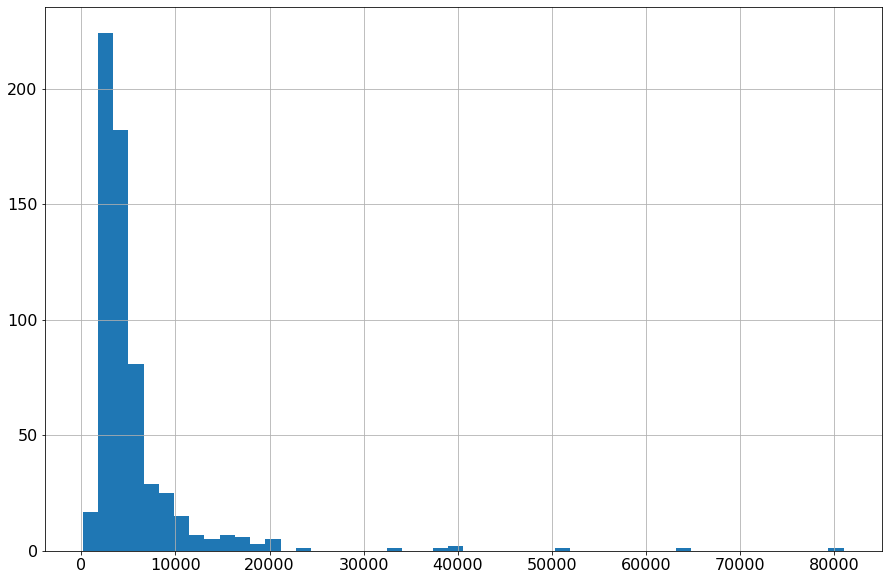

In [ ]:
df['ApplicantIncome'].hist(bins=50)
plt.show()

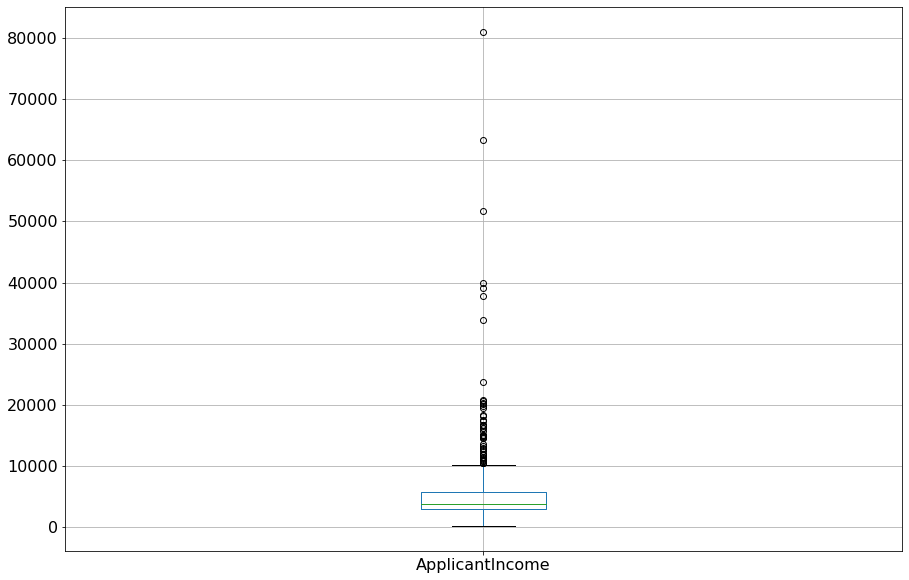

In [ ]:
df.boxplot(column='ApplicantIncome')
plt.show()

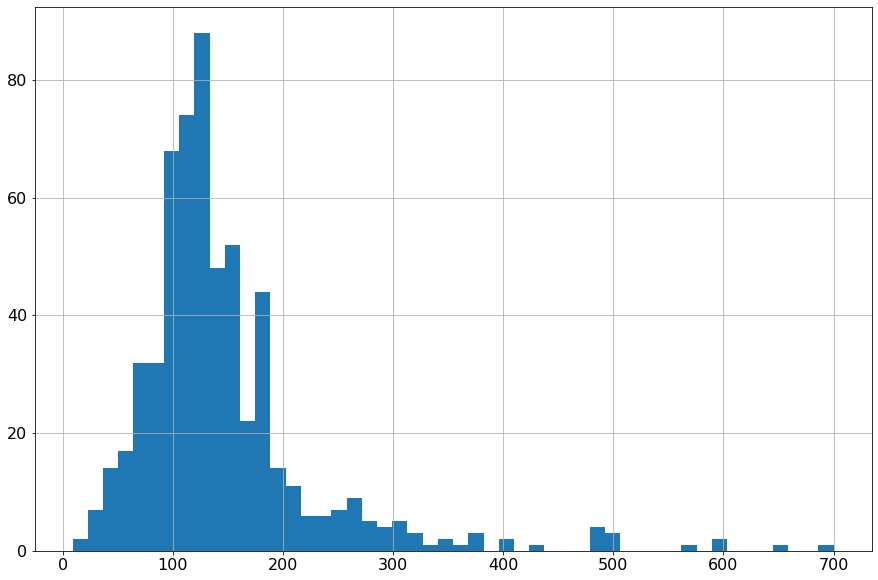

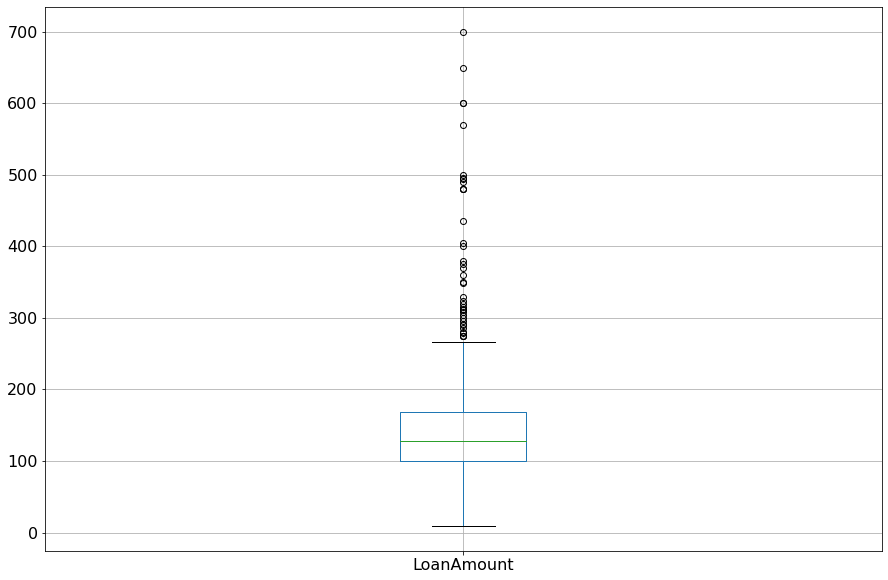

In [ ]:
df['LoanAmount'].hist(bins=50)
plt.show()
df.boxplot(column='LoanAmount')
plt.show()